## Viktorija Povilionytė, Namų darbas
## Viktorijos miesto(Kanada) AirBnB duomenų analizė

In [2]:
import datetime
import re
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.signal as signal
sns.set()

In [3]:
# Atidarome failus naudodami pd.read_csv()
listings = pd.read_csv(
    "C://Users//Win10//Desktop//programavimas//biod2021//nd1//rugsejis//listings.csv", index_col="id")
listings_details = pd.read_csv(
    "C://Users//Win10//Desktop//programavimas//biod2021//nd1//rugsejis//listings_details.csv",
    index_col="id"
)

calendar = pd.read_csv(
    "C://Users//Win10//Desktop//programavimas//biod2021//nd1//rugsejis//calendar.csv",
    parse_dates=["date"],
    index_col=["listing_id"],
)

reviews = pd.read_csv(
    "C://Users//Win10//Desktop//programavimas//biod2021//nd1//rugsejis//reviews.csv",
    parse_dates=["date"],
    index_col=["listing_id"],
)

reviews_details = pd.read_csv(
    "C://Users//Win10//Desktop//programavimas//biod2021//nd1//rugsejis//reviews_details.csv",
    parse_dates=["date"],
    index_col=["listing_id"],
)


C:\Users\Win10\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
pd.set_option("display.max_column", 500)
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_seq_items", 500)
pd.set_option("display.max_colwidth", 500)
pd.set_option("expand_frame_repr", True)

In [5]:
listings.head(3)

name  host_id  \
id                                                        
1591                 Garden Suite-King-Ensuite     1748   
19898                            Duchess Suite    69729   
41168  Burma Suite, Ocean Island Garden Suites   173169   

                        host_name neighbourhood_group neighbourhood  latitude  \
id                                                                              
1591                         Jeff            Victoria      Rockland  48.42128   
19898                        Ryan            Victoria      Rockland  48.42515   
41168  Ocean Island Garden Suites            Victoria     James Bay  48.41333   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
id                                                                            
1591  -123.33932     Private room    190               1                  1   
19898 -123.33977     Private room    279               2                  0   
41168 -123.37065  Entire home/apt    127               1                 41   

      last_review  reviews_per_month  calculated_host_listings_count  \
id                                                                     
1591   2021-09-13               1.00                               8   
19898         NaN                NaN                               1   
41168  2017-07-04               0.46                               4   

       availability_365  number_of_reviews_ltm  license  
id                                                       
1591                178                      1      NaN  
19898                 0                      0      NaN  
41168                 1                     21      NaN

In [6]:
# Pasižiūrime, kiek eilučių ir stulpelių sudaro listings
listings.shape

(3095, 17)

In [7]:
# Pasižiūrime, kokie yra stulpelių pavadinimai
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [8]:
listings_details.shape

(3095, 73)

In [9]:
listings_details.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated',

In [10]:
# Iš listings_details išsirenkame mums reikalingus stulpelius ir sujungiame su listings 
target_columns = [
   "property_type",
    "accommodates",
    "first_review",
    "review_scores_value",
    "review_scores_cleanliness",
    "review_scores_location",
    "review_scores_accuracy",
    "review_scores_communication",
    "review_scores_checkin",
    "review_scores_rating",
    "maximum_nights",
    "listing_url",
    "host_is_superhost",
    "host_about",
    "host_response_time",
    "host_response_rate",
    "neighbourhood_cleansed"
]
listings = pd.merge(
    listings, listings_details[target_columns], on="id", how="left")

In [11]:
listings.head(1)

name  host_id host_name neighbourhood_group  \
id                                                                       
1591  Garden Suite-King-Ensuite     1748      Jeff            Victoria   

     neighbourhood  latitude  longitude     room_type  price  minimum_nights  \
id                                                                             
1591      Rockland  48.42128 -123.33932  Private room    190               1   

      number_of_reviews last_review  reviews_per_month  \
id                                                       
1591                  1  2021-09-13                1.0   

      calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
id                                                                              
1591                               8               178                      1   

      license                      property_type  accommodates first_review  \
id                                                                            
1591      NaN  Private room in bed and breakfast             4   2021-09-13   

      review_scores_value  review_scores_cleanliness  review_scores_location  \
id                                                                             
1591                  3.0                        4.0                     5.0   

      review_scores_accuracy  review_scores_communication  \
id                                                          
1591                     2.0                          5.0   

      review_scores_checkin  review_scores_rating  maximum_nights  \
id                                                                  
1591                    5.0                   3.0            1125   

                            listing_url host_is_superhost  \
id                                                          
1591  https://www.airbnb.com/rooms/1591                 f   

                                                                                                                                                                                                                                                            host_about  \
id                                                                                                                                                                                                                                                                       
1591  I am innkeeper Jeff....\r\nI own and operate Abbeymoore manor BnB.\r\nWe are number 1 in Victoria and rated number 9 in Canada.\r\nWe are all about love and kindness... I keep the suites very clean and cheery so that your experience will be a good one.\r\n   

     host_response_time host_response_rate neighbourhood_cleansed  
id                                                                 
1591     within an hour               100%               Rockland

In [12]:
listings.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
property_type                      object
accommodates                        int64
first_review                       object
review_scores_value               float64
review_scores_cleanliness         float64
review_scores_location            float64
review_scores_accuracy            

In [13]:
# Patikriname ar visi stulpeliai turi duomenis
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3095 entries, 1591 to 52528612
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            3094 non-null   object 
 1   host_id                         3095 non-null   int64  
 2   host_name                       3094 non-null   object 
 3   neighbourhood_group             3095 non-null   object 
 4   neighbourhood                   3095 non-null   object 
 5   latitude                        3095 non-null   float64
 6   longitude                       3095 non-null   float64
 7   room_type                       3095 non-null   object 
 8   price                           3095 non-null   int64  
 9   minimum_nights                  3095 non-null   int64  
 10  number_of_reviews               3095 non-null   int64  
 11  last_review                     2804 non-null   object 
 12  reviews_per_month          

In [14]:
listings["license"].head()

id
1591    NaN
19898   NaN
41168   NaN
47421   NaN
54423   NaN
Name: license, dtype: float64

In [15]:
# Kadangi stulpelis license neturi duomenų, jį išmetame naudodami drop
listings = listings.drop(columns=["license"])

In [16]:
# Norint analizuoti duomenis, reikia pašalinti prie skaičių esančius nereikalingus simbolius
listings["host_response_rate"].head(2)

id
1591     100%
19898     NaN
Name: host_response_rate, dtype: object

In [17]:
listings["host_response_rate"] = pd.to_numeric( 
    listings["host_response_rate"].str.strip("%") 
)
listings["host_response_rate"].head(2)

id
1591     100.0
19898      NaN
Name: host_response_rate, dtype: float64

In [18]:
listings.isnull().sum()

name                                 1
host_id                              0
host_name                            1
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        291
reviews_per_month                  291
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
property_type                        0
accommodates                         0
first_review                       291
review_scores_value                294
review_scores_cleanliness          294
review_scores_location             294
review_scores_accuracy             294
review_scores_communication        294
review_scores_checkin              294
review_scores_rating     

In [19]:
import missingno as msno

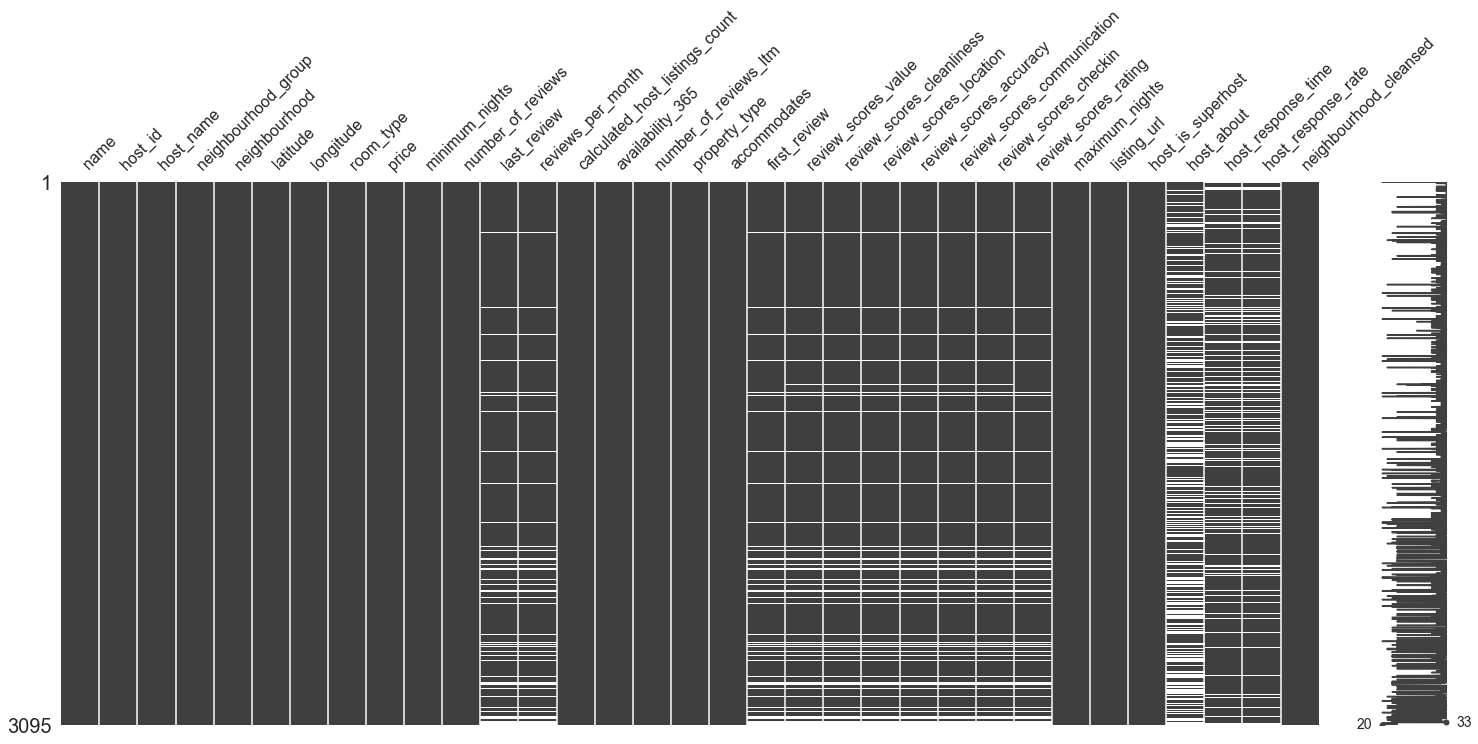

In [20]:
# Nusibraižome gafiką, kuris leistų lengviau pamatyti trūkstamas vertes
msno.matrix(listings);

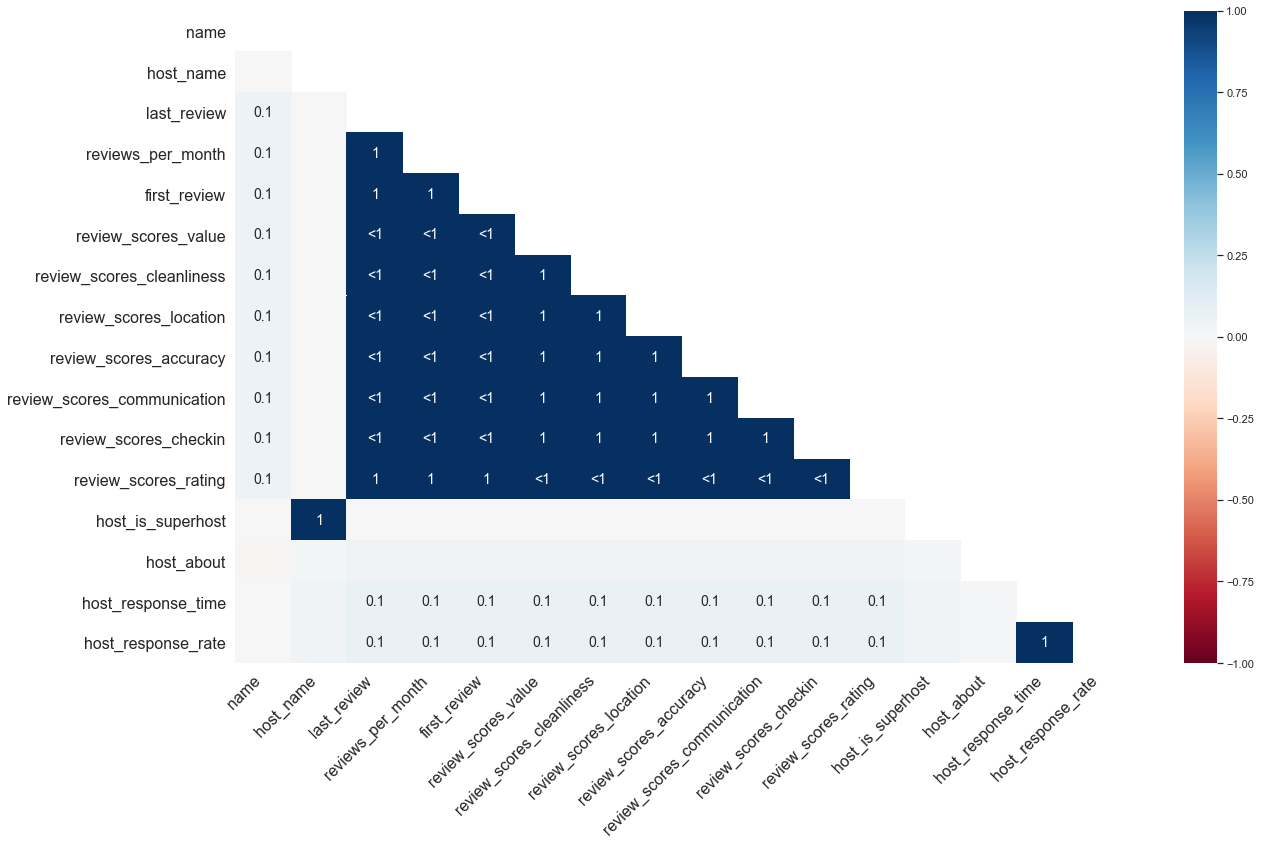

In [21]:
# Trūkstamų verčių žemėlapių būna įvairių, keli pavyzdžiai parodyti žemiau.
msno.heatmap(listings);

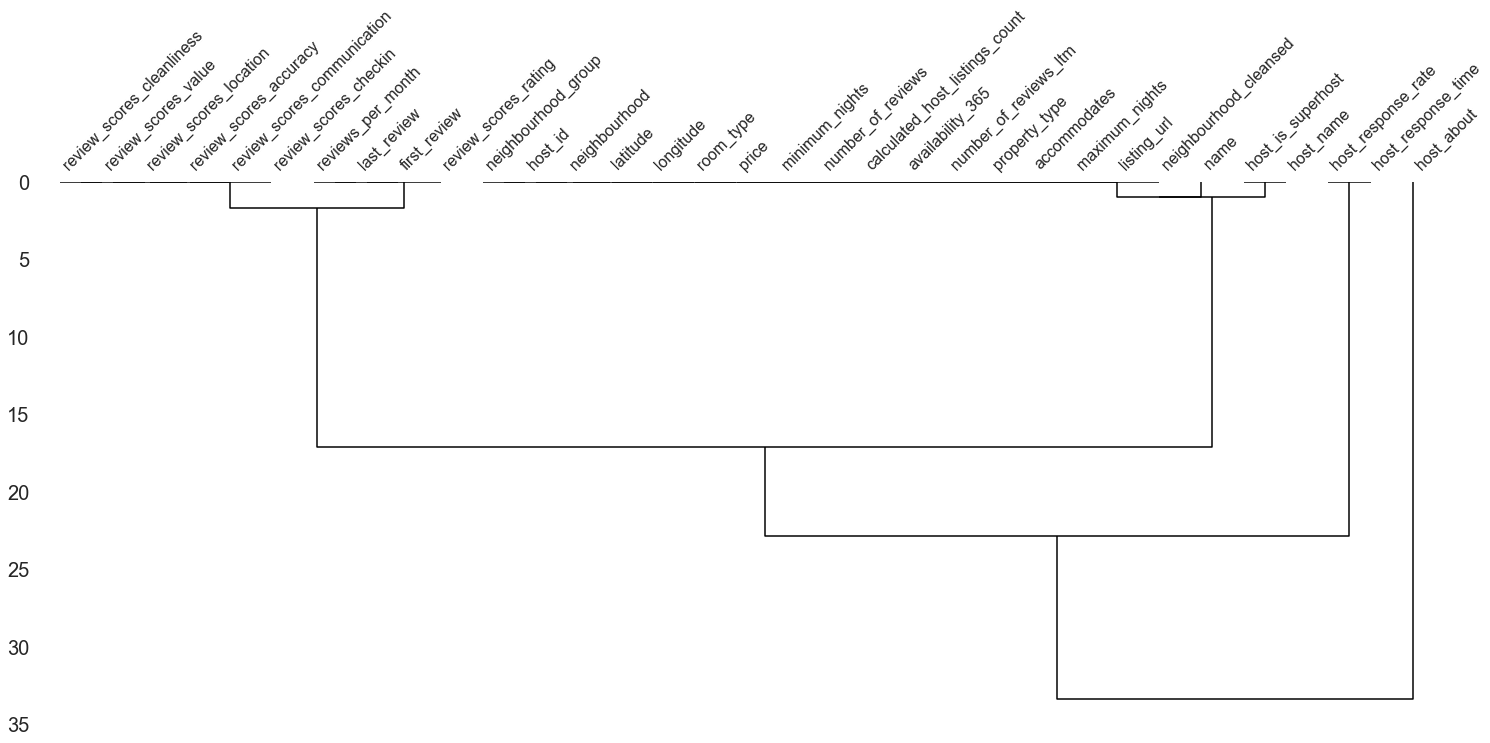

In [22]:
msno.dendrogram(listings);

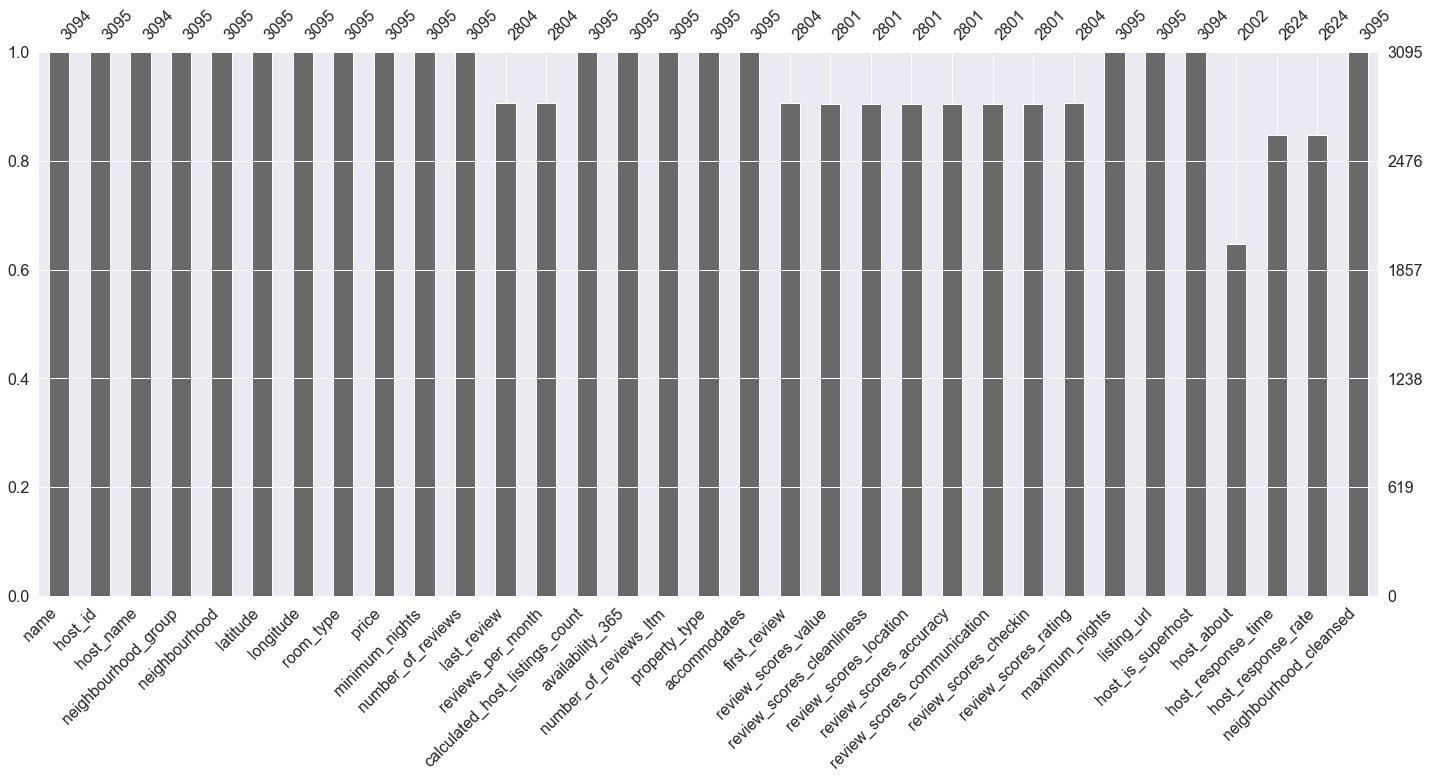

In [23]:
msno.bar(listings);

In [24]:
droped_Nan = listings.dropna()
droped_Nan

name    host_id  \
id                                                                        
1591                               Garden Suite-King-Ensuite       1748   
41168                Burma Suite, Ocean Island Garden Suites     173169   
47421                                   Downtown by the Park     214666   
54423     Perfect Downtown Condo, free secure onsite Parking     254653   
116831      Harbor View Studio in Restored Heritage Building     590251   
...                                                      ...        ...   
52056291  NEW! Boho Oasis: MarketSquare view + balcony + gym   16319802   
52128652           Happy Camper Mountainside Backyard Grotto  384429418   
52318730  1 Bedroom Ocean Front Cottage Sidney/North Saanich   94416058   
52338535     NEW Lovely 3Beds/2Bath condo Sleeps 6 W/Parking  310461616   
52367705       Ocean View Suite overlooking Esquimalt Lagoon  359502811   

                           host_name neighbourhood_group       neighbourhood  \
id                                                                             
1591                            Jeff            Victoria            Rockland   
41168     Ocean Island Garden Suites            Victoria           James Bay   
47421                          Jenny            Victoria            Downtown   
54423             Pawlina And Martin            Victoria            Downtown   
116831                   Agi & Marco            Victoria            Downtown   
...                              ...                 ...                 ...   
52056291                       Robyn            Victoria            Downtown   
52128652               Emily Rebecca  Salt Spring Island  Salt Spring Island   
52318730                         Sue       North Saanich       North Saanich   
52338535                      Sinead            Victoria            Downtown   
52367705                 Tammie-Lynn             Colwood             Colwood   

          latitude  longitude        room_type  price  minimum_nights  \
id                                                                      
1591      48.42128 -123.33932     Private room    190               1   
41168     48.41333 -123.37065  Entire home/apt    127               1   
47421     48.42106 -123.36340  Entire home/apt    100               4   
54423     48.42151 -123.36383  Entire home/apt     92              30   
116831    48.42852 -123.36961  Entire home/apt    109               1   
...            ...        ...              ...    ...             ...   
52056291  48.42906 -123.36762  Entire home/apt    154               1   
52128652  48.77886 -123.50465  Entire home/apt    120               2   
52318730  48.61422 -123.40100  Entire home/apt     98               1   
52338535  48.42480 -123.36450  Entire home/apt    210               2   
52367705  48.41935 -123.47994  Entire home/apt    125               2   

          number_of_reviews last_review  reviews_per_month  \
id                                                           
1591                      1  2021-09-13               1.00   
41168                    41  2017-07-04               0.46   
47421                    59  2019-08-06               0.44   
54423                    62  2019-09-30               1.25   
116831                  414  2021-09-25               8.51   
...                     ...         ...                ...   
52056291                  4  2021-09-25               4.00   
52128652                  1  2021-09-26               1.00   
52318730                  2  2021-09-26               2.00   
52338535                  1  2021-09-27               1.00   
52367705                  1  2021-09-26               1.00   

          calculated_host_listings_count  availability_365  \
id                                                           
1591                                   8               178   
41168                                  4                 1   
47421                             

## Keletas klausimų "apšilimui"

- Kuris rajonas turi daugiausiai skelbimų?

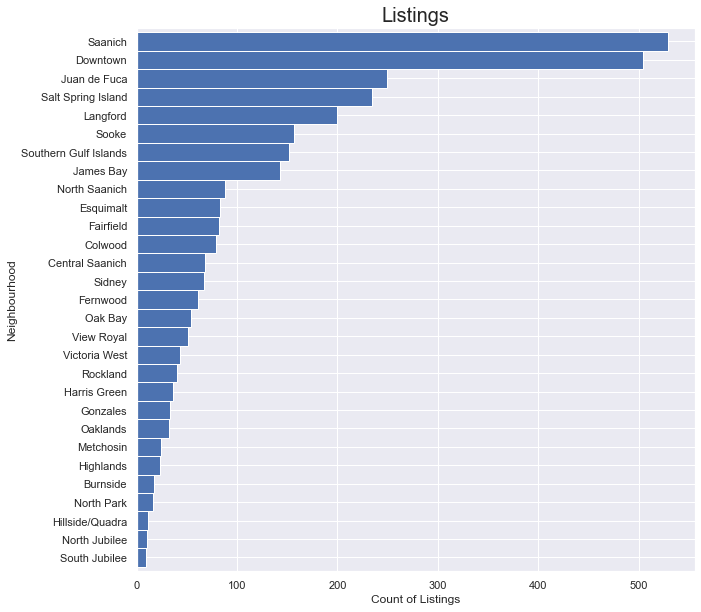

In [26]:
listings["neighbourhood"].value_counts().sort_values(ascending=True).plot.barh(
    figsize=(10, 10), color="b", width=1
)
plt.title("Listings", fontsize=20)
plt.xlabel("Count of Listings", fontsize=12)
plt.ylabel("Neighbourhood", fontsize=12);

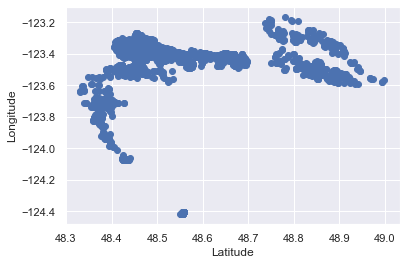

In [27]:
# Galime nubraižyti scatter grafiką, kuris parodytų nuomuojamų vietų pasiskirstymą platumoje ir ilgumoje.
lats = listings["latitude"].tolist()
lons = listings["longitude"].tolist()
locations = list(zip(lats, lons))
plt.scatter(lats, lons)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Longitude",fontsize=12);

In [28]:
pip install folium

In [29]:
#Instaliuojame folium, kad galėtume braižyti žemėlapius
import folium
from folium.plugins import FastMarkerCluster

In [30]:
# Žemėlapyje matosi, kur daugiausia yra nuomos pasiūlymų.
map1 = folium.Map(location=[48.45,-123.4], zoom_start=10.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

- Dažniausi kambarių tipai

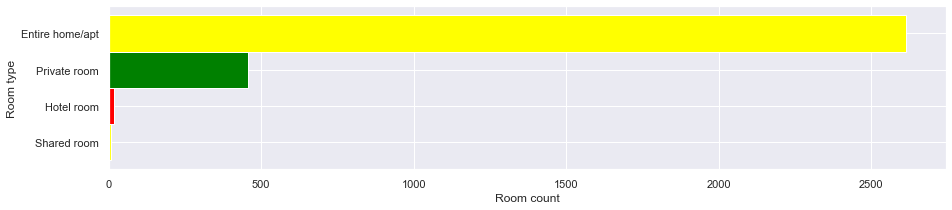

In [32]:
listings["room_type"].value_counts().sort_values(ascending=True).plot.barh(
    figsize=(15, 3), width=1, color=["yellow", "red", "green"]
)
plt.xlabel("Room count")
plt.ylabel("Room type");

- Visi būstų tipai

In [233]:
listings.property_type.unique()

array(['Private room in bed and breakfast', 'Private room in rental unit',
       'Entire rental unit', 'Private room in residential home',
       'Entire guest suite', 'Entire cabin', 'Entire residential home',
       'Entire loft', 'Entire condominium (condo)',
       'Private room in guest suite', 'Entire bungalow',
       'Entire guesthouse', 'Entire cottage', 'Farm stay',
       'Private room in hostel', 'Private room in condominium (condo)',
       'Private room in bungalow', 'Entire place',
       'Entire bed and breakfast', 'Earth house', 'Houseboat',
       'Entire townhouse', 'Entire serviced apartment', 'Tiny house',
       'Private room in townhouse', 'Private room in treehouse',
       'Entire chalet', 'Private room in farm stay', 'Boat',
       'Private room in tiny house', 'Private room in cabin',
       'Private room in nature lodge', 'Private room in guesthouse',
       'Tent', 'Floor', 'Private room in villa',
       'Room in bed and breakfast', 'Tipi', 'Barn',
      

- Kiek ir kokio tipo būstų yra nuomojama?

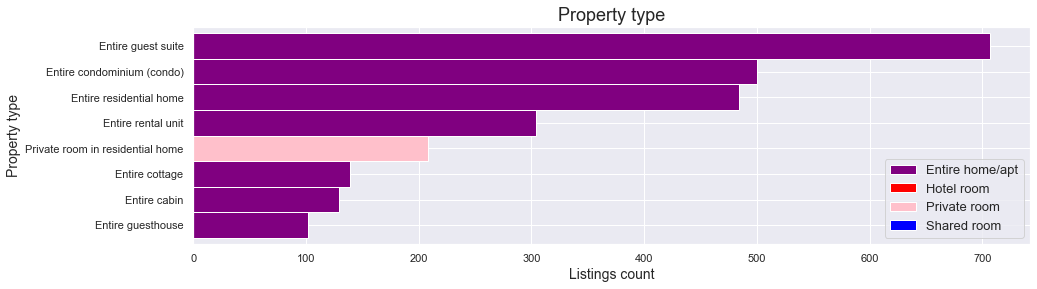

In [33]:
prop = listings.groupby(["property_type", "room_type"]).room_type.count()
prop = prop.unstack()
prop["total"] = prop.iloc[:, 0:3].sum(axis=1)
prop = prop.sort_values(by=["total"])
prop = prop[prop["total"] >= 100]
prop = prop.drop(columns=["total"])
prop.plot(
    kind="barh",
    stacked=True,
    color=["purple", "red", "pink","blue"],
    linewidth=1,
    grid=True,
    figsize=(15, 4),
    width=1,
)
plt.title("Property type", fontsize=18)
plt.xlabel("Listings count", fontsize=14)
plt.ylabel("Property type", fontsize=14)
plt.legend(loc=4, prop={"size": 13});

- Kiek žmonių gali atvykti į būstą

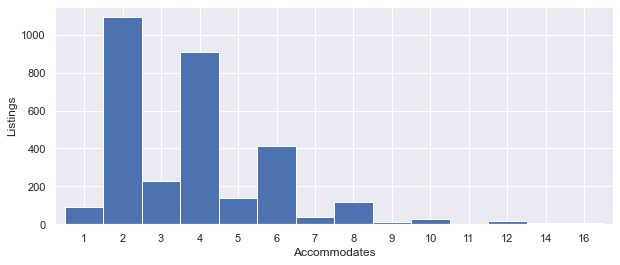

In [34]:
listings["accommodates"].value_counts().sort_index().plot.bar(
    figsize=(10, 4), color="b", width=1, rot=0
)
plt.ylabel("Listings", fontsize=12)
plt.xlabel("Accommodates", fontsize=12);

- Kokia dalis visų būstų yra nuomojama profesionalių nuomotojų


In [35]:
freq = (
    listings.groupby(["host_id"])["host_name"]
    .count()
    .reset_index(name="Number of apartments")
)
freq.head()

host_id  Number of apartments
0     1748                     8
1    13293                     1
2    64647                     1
3    69729                     1
4    74323                     3

- Suskaičiuojam kiek yra skirtingų nuomotojų

In [36]:
host = (
    freq.groupby(["Number of apartments"])["host_id"]
    .count()
    .reset_index(name="Number of hosts")
)
host.head()

Number of apartments  Number of hosts
0                     0                1
1                     1             1633
2                     2              211
3                     3               87
4                     4               23

- Daugiausiai būstų nuomojantis asmuo

In [37]:
freq[freq["Number of apartments"] >= 30].sort_values(by=["Number of apartments"], ascending=False)

host_id  Number of apartments
665  32614142                    42
768  40529437                    40
287   9153672                    37
798  43314463                    30

In [38]:
top1=listings.loc[listings['host_id']==32614142]
top1

name   host_id  \
id                                                                       
11842984                       10 Mile Point Port Side Suite  32614142   
11847848  10 Mile Point Stunning Oceanfront-LONG TERM AVAIL!  32614142   
20588732                                  *Parker By The Sea  32614142   
21027390                            *Meadowbrook Guest Suite  32614142   
21325229                    *Kaylas Beach House in Gyro Park  32614142   
22687736                                 *Daes Seaside Dream  32614142   
22814420                           Era Suite Living on Yates  32614142   
30360833  *Elegantly Appointed Townhome for 55+ / 28 Day Min  32614142   
30361036    *Prestigious Promontory 2 bedroom w/ Ocean Views  32614142   
30756663        *Historic Hudson 2 bed Condo - 28 Night Min.  32614142   
32345540                         Sea Breeze Ocean Front Home  32614142   
32348509                      Deep Cove Retreat on the Ocean  32614142   
34093181                     Encore by the Bay  - 30 Day Min  32614142   
34601341         *San Jose Cottage in the Heart of James Bay  32614142   
38381914                             Euphoria at the Astoria  32614142   
38951840                     *Cozy Creekside 1 bedroom condo  32614142   
39004930  The Jukebox - Modern industrial 1 bedroom Downtown  32614142   
40470950                                         11th Heaven  32614142   
41937895                    Private, Modern Queenswood Suite  32614142   
42026508                             Serene Escape 3 bedroom  32614142   
43517489                                 Cedar Creek Cottage  32614142   
44218047        Ponds Landing - 1 bed condo on Bear Mountain  32614142   
44218126     Otter Grotto 1 bed suite- Oceanfront Relaxation  32614142   
44541282                     Willow Suite - Lakeside Retreat  32614142   
45262629                    A Peaceful stay in Brentwood Bay  32614142   
46242704                       Orca View Suite 10 Mile Point  32614142   
46795969          *Bliss by the Bay w/ Amazing Rooftop Patio  32614142   
46885726           Walnut St. Suite in the heart of Fernwood  32614142   
47521285                              Dream View Beach House  32614142   
48158378    Otter Grotto 2 bed Suite - Oceanfront Relaxation  32614142   
48944160            Getaway in James Bay - 4 Bed Family Home  32614142   
49174311                                    Sunnyside Escape  32614142   
50006697  Salish Sights at the Falls- 2 Bed w/Stunning Views  32614142   
50032182                      The Humboldt Hub - City Escape  32614142   
50075385                    Urban City Living at the Jukebox  32614142   
50314149                                 Queenswood Skyperch  32614142   
50363027                                     Sherborne House  32614142   
50700210  Portage Paradise - 3 bedroom home with inlet views  32614142   
50705955   Cedar Hill Sunlit Stay - Bright Spacious & Modern  32614142   
50980019    Sea-esta Suite with Ocean Views in Brentwood Bay  32614142   
51154863                                The Nest is Vic West  32614142   
51773154                     Counrty Charm on Tod Creek Farm  32614142   

                     host_name neighbourhood_group    neighbourhood  latitude  \
id                                                                              
11842984  Elite Vacation Homes             Saanich          Saanich  48.45550   
11847848  Elite Vacation Homes             Saanich          Saanich  48.45472   
20588732  Elite Vacation Homes             Saanich          Saanich  48.52870   
21027390  Elite Vacation Homes             Saanich          Saanich  48.52069   
21325229  Elite Vacation Homes             Saanich          Saanich  48.46140   
22687736  Elite Vacation Homes             Saanich          Saanich  48.45468   
22814420  Elite Vacation Homes            Victoria         Downtown  48.42577   
30360833  Elite Vacation Homes     Central Saanich  Central Saanich  4

In [39]:
listings[listings['host_id'].isin([32614142])]

name   host_id  \
id                                                                       
11842984                       10 Mile Point Port Side Suite  32614142   
11847848  10 Mile Point Stunning Oceanfront-LONG TERM AVAIL!  32614142   
20588732                                  *Parker By The Sea  32614142   
21027390                            *Meadowbrook Guest Suite  32614142   
21325229                    *Kaylas Beach House in Gyro Park  32614142   
22687736                                 *Daes Seaside Dream  32614142   
22814420                           Era Suite Living on Yates  32614142   
30360833  *Elegantly Appointed Townhome for 55+ / 28 Day Min  32614142   
30361036    *Prestigious Promontory 2 bedroom w/ Ocean Views  32614142   
30756663        *Historic Hudson 2 bed Condo - 28 Night Min.  32614142   
32345540                         Sea Breeze Ocean Front Home  32614142   
32348509                      Deep Cove Retreat on the Ocean  32614142   
34093181                     Encore by the Bay  - 30 Day Min  32614142   
34601341         *San Jose Cottage in the Heart of James Bay  32614142   
38381914                             Euphoria at the Astoria  32614142   
38951840                     *Cozy Creekside 1 bedroom condo  32614142   
39004930  The Jukebox - Modern industrial 1 bedroom Downtown  32614142   
40470950                                         11th Heaven  32614142   
41937895                    Private, Modern Queenswood Suite  32614142   
42026508                             Serene Escape 3 bedroom  32614142   
43517489                                 Cedar Creek Cottage  32614142   
44218047        Ponds Landing - 1 bed condo on Bear Mountain  32614142   
44218126     Otter Grotto 1 bed suite- Oceanfront Relaxation  32614142   
44541282                     Willow Suite - Lakeside Retreat  32614142   
45262629                    A Peaceful stay in Brentwood Bay  32614142   
46242704                       Orca View Suite 10 Mile Point  32614142   
46795969          *Bliss by the Bay w/ Amazing Rooftop Patio  32614142   
46885726           Walnut St. Suite in the heart of Fernwood  32614142   
47521285                              Dream View Beach House  32614142   
48158378    Otter Grotto 2 bed Suite - Oceanfront Relaxation  32614142   
48944160            Getaway in James Bay - 4 Bed Family Home  32614142   
49174311                                    Sunnyside Escape  32614142   
50006697  Salish Sights at the Falls- 2 Bed w/Stunning Views  32614142   
50032182                      The Humboldt Hub - City Escape  32614142   
50075385                    Urban City Living at the Jukebox  32614142   
50314149                                 Queenswood Skyperch  32614142   
50363027                                     Sherborne House  32614142   
50700210  Portage Paradise - 3 bedroom home with inlet views  32614142   
50705955   Cedar Hill Sunlit Stay - Bright Spacious & Modern  32614142   
50980019    Sea-esta Suite with Ocean Views in Brentwood Bay  32614142   
51154863                                The Nest is Vic West  32614142   
51773154                     Counrty Charm on Tod Creek Farm  32614142   

                     host_name neighbourhood_group    neighbourhood  latitude  \
id                                                                              
11842984  Elite Vacation Homes             Saanich          Saanich  48.45550   
11847848  Elite Vacation Homes             Saanich          Saanich  48.45472   
20588732  Elite Vacation Homes             Saanich          Saanich  48.52870   
21027390  Elite Vacation Homes             Saanich          Saanich  48.52069   
21325229  Elite Vacation Homes             Saanich          Saanich  48.46140   
22687736  Elite Vacation Homes             Saanich          Saanich  48.45468   
22814420  Elite Vacation Homes            Victoria         Downtown  48.42577   
30360833  Elite Vacation Homes     Central Saanich  Central Saanich  4

In [40]:
np.sum(top1['price'])

9192

In [41]:
top2=listings.loc[listings['host_id']==40529437]

In [42]:
np.sum(top2['price'])

7446

- Vidutinės kainos visam namui/butui


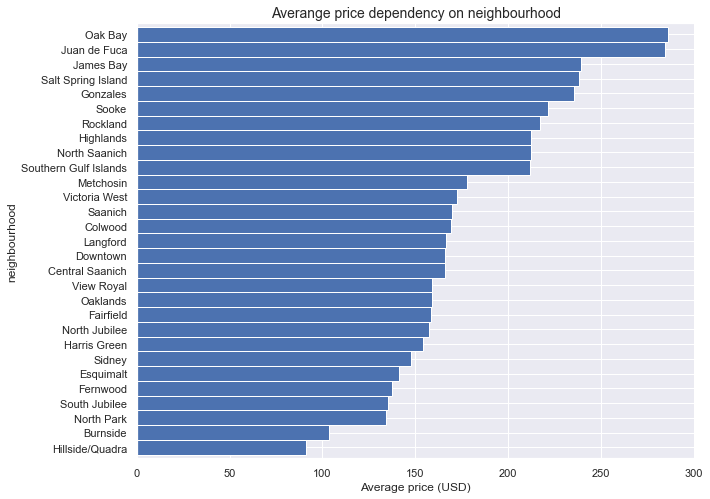

In [44]:
listings[listings["room_type"] == "Entire home/apt"].groupby("neighbourhood")[
    "price"
].mean().sort_values(ascending=True).plot.barh(figsize=(10, 8), color="b", width=1)
plt.title("Averange price dependency on neighbourhood",fontsize=14)
plt.xlabel("Average price (USD)", fontsize=12);

- Kaip kainos priklauso nuo vietos ir būsto tipo?


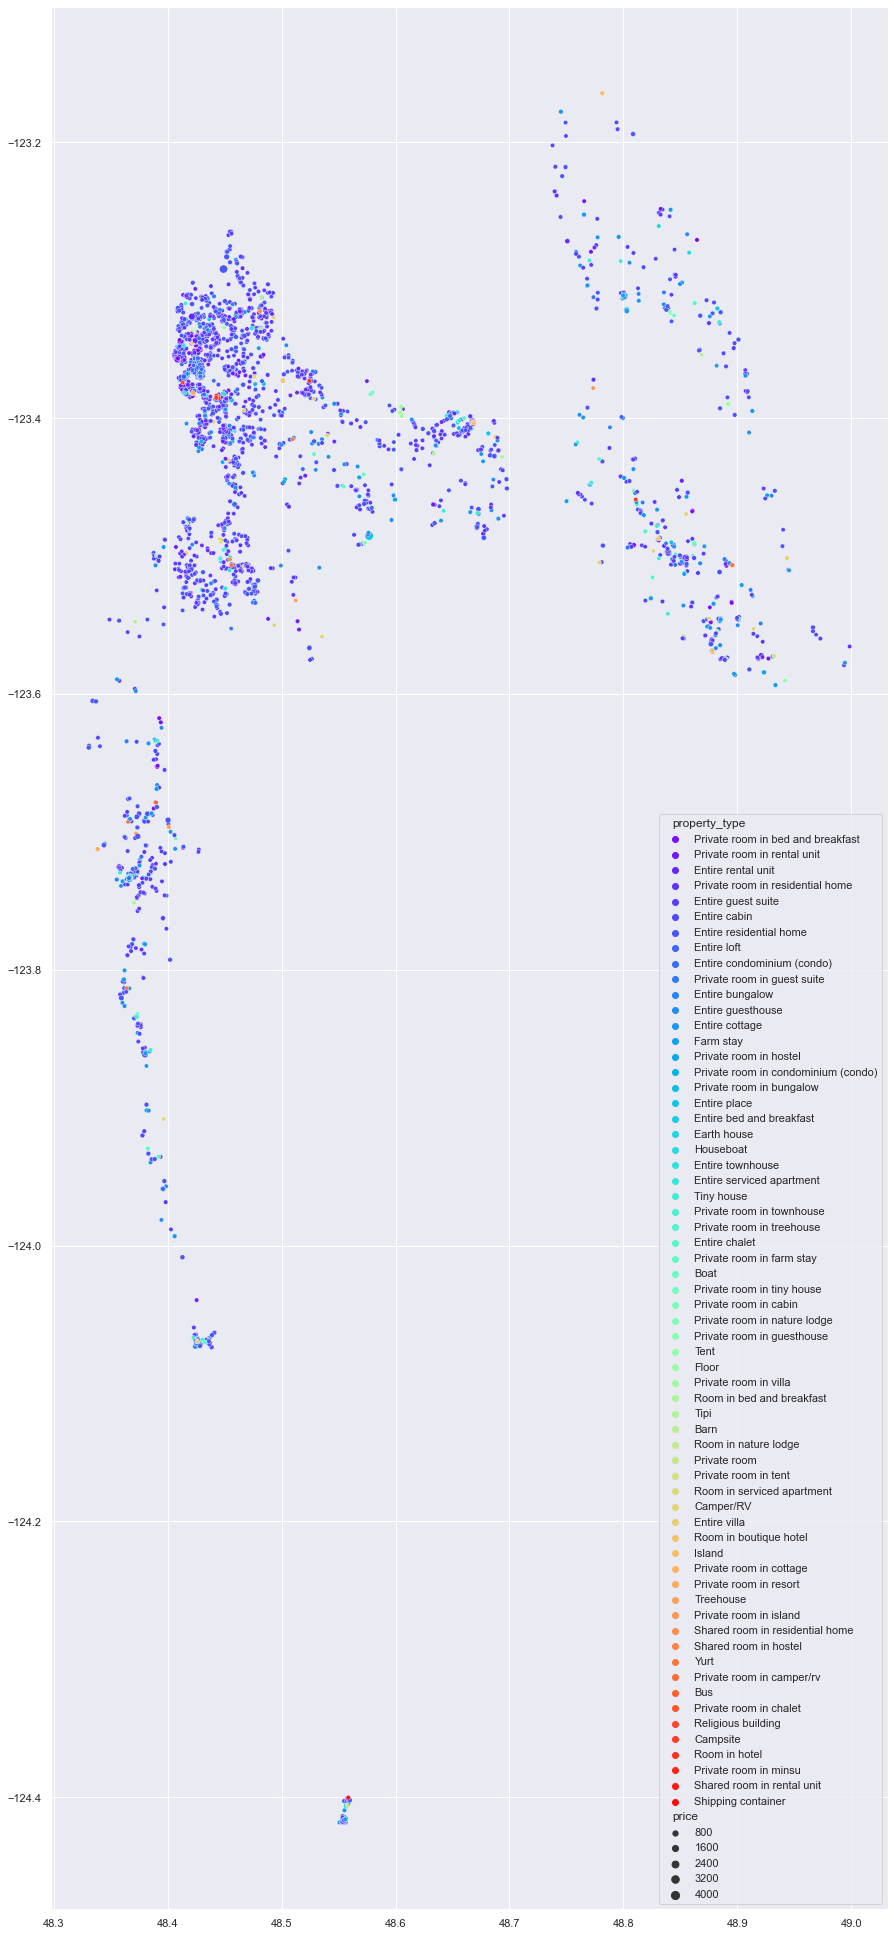

In [45]:
plt.figure(figsize=(15, 35))
sns.scatterplot(
    x=lats,
    y=lons,
    hue=listings["property_type"],
    size=listings["price"],
    s=15,
    palette="rainbow"
);


- Kainų pasiskirstymas kiekvienam tipui

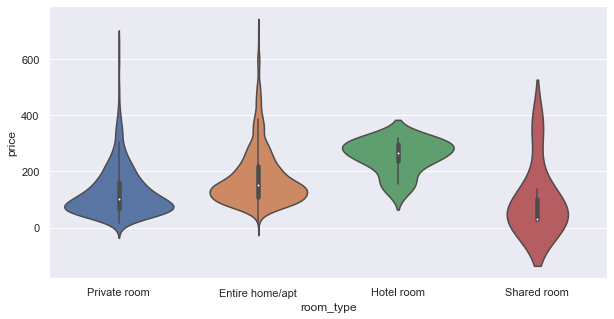

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(x="room_type", y="price",
               data=listings[listings["price"] <= 700], ax=ax);

## 1. Top 10 savininkų (daugiausiai nuomoja, uždirba).

In [47]:
top_host_10Id=(
    freq[freq["Number of apartments"] >= 17]
    .sort_values(by=["Number of apartments"], ascending=False)
    .head(10)
)
top_host_10Id

host_id  Number of apartments
665    32614142                    42
768    40529437                    40
287     9153672                    37
798    43314463                    30
331    10981379                    25
136     3827344                    22
488    19980320                    20
288     9176808                    18
1269  111074550                    18
79      2001974                    17

In [48]:
top_host_10Id = (
    listings.groupby(["host_id"])["host_name"]
    .count()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
    .head(10)
)
print(top_host_10Id)

        host_id  count
665    32614142     42
768    40529437     40
287     9153672     37
798    43314463     30
331    10981379     25
136     3827344     22
488    19980320     20
288     9176808     18
1269  111074550     18
79      2001974     17


In [49]:
for t_id in top_host_10Id["host_id"].to_numpy():
    print(listings.loc[listings["host_id"] == t_id].iloc[1, 2])

Elite Vacation Homes
Victoria Prime Services
Co-Hosts
Rob&Jen
Jan
Jose
Radie
Victoria Executive Rentals
Lipton
Martin


In [50]:
top1_host_10Id = (
    listings.groupby(["host_id"])["host_name"]
    .count()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
    .head(10)
)
print(top1_host_10Id)

        host_id  count
665    32614142     42
768    40529437     40
287     9153672     37
798    43314463     30
331    10981379     25
136     3827344     22
488    19980320     20
288     9176808     18
1269  111074550     18
79      2001974     17


In [51]:
hostplaces_price_sum = (
    listings[listings["host_id"].isin(top1_host_10Id["host_id"])]
    .groupby("host_id")["price"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
hostplaces_price_sum.head()


host_id
10981379    9242
32614142    9192
9153672     8758
40529437    7446
43314463    6932
Name: price, dtype: int64

In [52]:
for c_id, c_sum in zip(hostplaces_price_sum.index.to_numpy(), hostplaces_price_sum.to_numpy()):
    print(
        f'{listings.loc[listings["host_id"] == c_id].iloc[1, 2]} earns {c_sum}')

Jan earns 9242
Elite Vacation Homes earns 9192
Co-Hosts earns 8758
Victoria Prime Services earns 7446
Rob&Jen earns 6932
Lipton earns 4982
Jose earns 4910
Victoria Executive Rentals earns 4002
Radie earns 3082
Martin earns 1377


## 2. Kaip kaina priklauso nuo vietos mieste įvertinimo? Švaros? Prisiregistravimo? Susisiekimą?


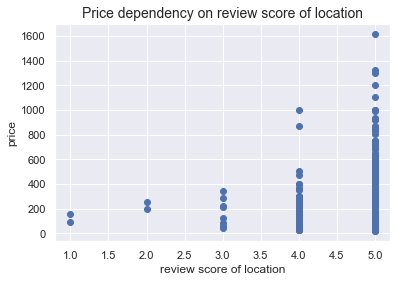

In [54]:
plt.scatter(round(listings.review_scores_location,), listings.price)
plt.title("Price dependency on review score of location",fontsize=14)
plt.xlabel("review score of location")
plt.ylabel("price");

In [55]:
rw_sc = round(listings.review_scores_location,)
rw_sc_loc = listings.groupby(rw_sc).price.mean()
rw_sc_loc

review_scores_location
1.0    124.500000
2.0    222.000000
3.0    171.000000
4.0    166.981308
5.0    177.909769
Name: price, dtype: float64

In [56]:
listings['review_scores_location']=round(listings['review_scores_location'])

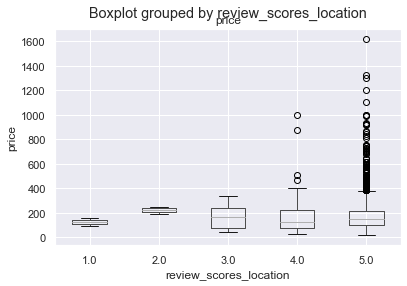

In [57]:
listings.boxplot(column="price", by= "review_scores_location")
plt.ylabel('price');

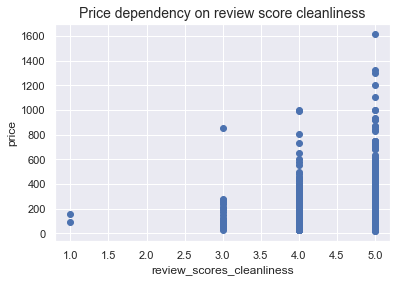

In [58]:
plt.scatter(round(listings.review_scores_cleanliness), listings.price)
plt.title("Price dependency on review score cleanliness",fontsize=14)
plt.xlabel("review_scores_cleanliness")
plt.ylabel("price");

In [59]:
rw_sc1 = round(listings.review_scores_cleanliness,)
rw_sc_cl = listings.groupby(rw_sc1).price.mean()
rw_sc_cl

review_scores_cleanliness
1.0    124.500000
3.0    173.047619
4.0    193.173709
5.0    176.238986
Name: price, dtype: float64

In [60]:
listings['review_scores_cleanliness']=round(listings['review_scores_cleanliness'])

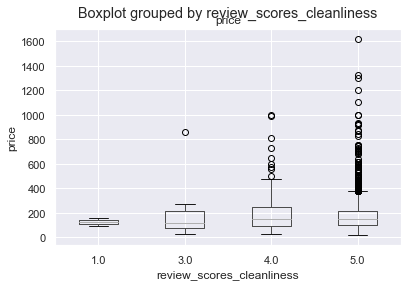

In [61]:
listings.boxplot(column="price", by= "review_scores_cleanliness")
plt.ylabel('price');

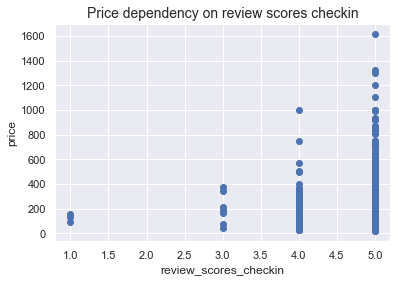

In [62]:
plt.scatter(round(listings.review_scores_checkin), listings.price)
plt.title("Price dependency on review scores checkin",fontsize=14)
plt.xlabel("review_scores_checkin")
plt.ylabel("price");

In [63]:
rw_sc2 = round(listings.review_scores_checkin,)
rw_sc_ch = listings.groupby(rw_sc2).price.mean()
rw_sc_ch

review_scores_checkin
1.0    126.666667
3.0    199.714286
4.0    187.027523
5.0    177.076063
Name: price, dtype: float64

In [64]:
listings['review_scores_checkin']=round(listings['review_scores_checkin'])

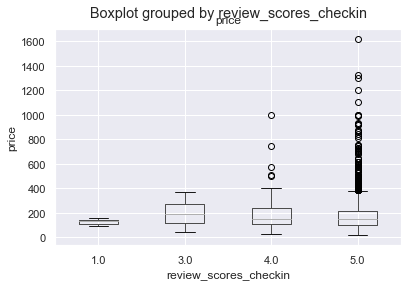

In [65]:
listings.boxplot(column="price", by= "review_scores_checkin")
plt.ylabel('price');

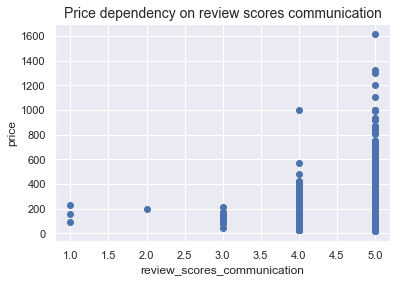

In [66]:

plt.scatter(round(listings.review_scores_communication), listings.price)
plt.title("Price dependency on review scores communication",fontsize=14)
plt.xlabel("review_scores_communication")
plt.ylabel("price");

In [67]:
rw_sc3 = round(listings.review_scores_communication,)
rw_sc_com = listings.groupby(rw_sc3).price.mean()
rw_sc_com

review_scores_communication
1.0    159.666667
2.0    194.000000
3.0    125.600000
4.0    173.068627
5.0    177.839851
Name: price, dtype: float64

In [68]:
listings['review_scores_communication']=round(listings['review_scores_communication'])

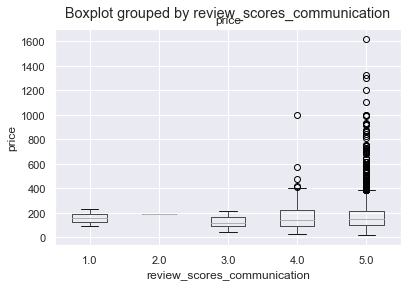

In [69]:
listings.boxplot(column="price", by= "review_scores_communication")
plt.ylabel('price');

## 3. Rasti savininkus įvardintus kaip 'superhosts'. Kokią dalį visų nuomotojų jie sudaro?


In [70]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'property_type', 'accommodates',
       'first_review', 'review_scores_value', 'review_scores_cleanliness',
       'review_scores_location', 'review_scores_accuracy',
       'review_scores_communication', 'review_scores_checkin',
       'review_scores_rating', 'maximum_nights', 'listing_url',
       'host_is_superhost', 'host_about', 'host_response_time',
       'host_response_rate', 'neighbourhood_cleansed'],
      dtype='object')

In [71]:
listings.host_is_superhost.isnull().sum()

1

In [72]:
listings.host_is_superhost.notnull().sum()

3094

In [73]:
total = listings.host_is_superhost.shape[0]
total

3095

In [74]:
superhosts = listings.host_is_superhost.str.count(r"t").sum()
superhosts

1567.0

In [75]:
print(f" Super hosts are {superhosts/total*100:.3}% of all the landlords")

 Super hosts are 50.6% of all the landlords


## 4. Ilgiausias komentaras (reviews_details)

In [76]:
reviews_details.comments.iloc[0]

'Jeff is a wonderful host and breakfast was amazing. It was really nice to eat on the patio and meet other visitors to Victoria. The inn is perfectly located - quiet and convenient to all.'

In [77]:
len(reviews_details.comments.iloc[0])

187

Su ilgiausiu komentaru

In [78]:
reviews_details.comments.str.len().sort_values(ascending=False).head()

listing_id
19245157    5279.0
26089284    5045.0
24334585    4847.0
43300299    4336.0
16499619    4269.0
Name: comments, dtype: float64

In [79]:
reviews_details.loc[19245157]

id       date  reviewer_id      reviewer_name  \
listing_id                                                         
19245157    187284828 2017-08-26    122001229             Jascha   
19245157    187870451 2017-08-27     78289694               Yilu   
19245157    188280216 2017-08-28    146678835             Marion   
19245157    189127685 2017-08-31    147832595             Julian   
19245157    190727420 2017-09-04     25481072            Eduardo   
19245157    192071306 2017-09-09     51892082               Tong   
19245157    192645746 2017-09-10     25691486              Amber   
19245157    193235595 2017-09-12      8312316                Luc   
19245157    195547298 2017-09-19    107833945               Gina   
19245157    195786421 2017-09-20    117995803               Ange   
19245157    196588285 2017-09-23    140480392              Bruce   
19245157    197196998 2017-09-24    142109186               Jack   
19245157    198224321 2017-09-28    131773885           Tristant   
19245157    198860351 2017-09-30     60161879               Feng   
19245157    200007765 2017-10-03     15120231            Timothy   
19245157    200513635 2017-10-05     51892082               Tong   
19245157    202317766 2017-10-10    152873912          Francesca   
19245157    204143328 2017-10-16    150693839                Ani   
19245157    206089990 2017-10-23     61865450               Alan   
19245157    209982927 2017-11-06     81130547              Brian   
19245157    210706102 2017-11-10      5718137                Pam   
19245157    211397824 2017-11-12     57643760              Glenn   
19245157    221773318 2017-12-27      4209560              Wyatt   
19245157    226457369 2018-01-10    151791617               John   
19245157    227714826 2018-01-15    166565372              Ellen   
19245157    228646032 2018-01-20    124240188            Chandra   
19245157    230718445 2018-01-28    168605500               Norm   
19245157    231528771 2018-02-01    169903178            Leticia   
19245157    233708620 2018-02-10     42233115               Anne   
19245157    236243809 2018-02-18      9848330               Kent   
19245157    236584672 2018-02-19     30218111           Huacheng   
19245157    248525999 2018-03-31     73800489            Jeffrey   
19245157    249744930 2018-04-02     55926135           Beatrice   
19245157    250342293 2018-04-04     60545833           Cathleen   
19245157    254470369 2018-04-16     15603512              Chris   
19245157    255790007 2018-04-21    183374123             Anuisa   
19245157    260378670 2018-05-04     42635339                Pam   
19245157    261692975 2018-05-06     26260479             Amanda   
19245157    262108586 2018-05-07      9068065               Kate   
19245157    263727273 2018-05-12     49136376              Rohan   
19245157    265309245 2018-05-16    120917044               Jose   
19245157    265624815 2018-05-17    184974058              JoAnn   
19245157    266274293 2018-05-19     70840850     Emma And Corey   
19245157    267457141 2018-05-21     55474693             Andrew   
19245157    268047000 2018-05-23     92470644             Lesley   
19245157    268662005 2018-05-25      2224766       Laura & Juan   
19245157    269677567 2018-05-27      1192448              Sunny   
19245157    270639156 2018-05-29     78519105             Darryl   
19245157    271245941 2018-05-31    168657055            Caitlin   
19245157    273052459 2018-06-04     25747827                 Mo   
19245157    273920257 2018-06-07     45697313          Meah Hock   
19245157    276790356 2018-06-14     67676398                Rui   
19245157    277606187 2018-06-16    148773517          Catherine   
19245157    278735274 2018-06-18      5799225               Olly   
19245157    279472209 2018-06-20    191070664               Amit   
19245157    280198338 2018-06-22     61008330              Steve   
19245157    281881566 2018-06-25      8925624              Peter   
1924515

In [81]:
for review in reviews_details.loc[19245157].comments:
    print(len(review))

69
32
143
549
94
130
418
212
229
52
311
230
241
264
223
102
183
31
288
257
105
308
211
30
103
213
68
63
167
254
46
355
234
342
341
469
261
60
257
158
273
34
27
323
57
65
61
165
141
200
337
28
349
335
260
156
59
161
63
89
136
274
380
162
36
215
57
256
281
186
160
348
314
309
23
92
278
251
27
529
277
74
139
237
174
88
160
179
286
66
61
154
80
294
96
154
27
172
89
968
15
48
191
70
449
74
28
226
93
36
173
67
133
359
357
179
102
220
244
37
101
169
77
393
280
122
16
173
316
88
5279
345
189
42
109
120
208
280
32
517
146
96
53
488
141
191
405
325
42
204
112
597
54
93
162
796
227
226
122
76
41
159
97
320
155
369
89
16
170
20
176
64
115
81
161
58
196
381
60
312
329
135
99
173
111
94
60
195


In [83]:
reviews_details.loc[19245157].set_index("id")["comments"].str.len()

id
187284828      69
187870451      32
188280216     143
189127685     549
190727420      94
192071306     130
192645746     418
193235595     212
195547298     229
195786421      52
196588285     311
197196998     230
198224321     241
198860351     264
200007765     223
200513635     102
202317766     183
204143328      31
206089990     288
209982927     257
210706102     105
211397824     308
221773318     211
226457369      30
227714826     103
228646032     213
230718445      68
231528771      63
233708620     167
236243809     254
236584672      46
248525999     355
249744930     234
250342293     342
254470369     341
255790007     469
260378670     261
261692975      60
262108586     257
263727273     158
265309245     273
265624815      34
266274293      27
267457141     323
268047000      57
268662005      65
269677567      61
270639156     165
271245941     141
273052459     200
273920257     337
276790356      28
277606187     349
278735274     335
279472209     260
2801983

## 5. Daugiausiai komentarų turinti vieta.

In [84]:
reviews_details.groupby("listing_id")["id"].count(
).sort_values(ascending=False).head(1)

listing_id
9707699    719
Name: id, dtype: int64

In [85]:
reviews_details.loc[9707699]

id       date  reviewer_id reviewer_name  \
listing_id                                                             
9707699               57986263 2015-12-30     52583161      Lorraine   
9707699               58111863 2015-12-31      9870247       Patrick   
9707699               58724894 2016-01-03      7781278         Devin   
9707699               59107842 2016-01-06     34099212         Chris   
9707699               59266398 2016-01-08     52098959          Matt   
...                        ...        ...          ...           ...   
9707699     448609855771860358 2021-09-10     67048104           Jim   
9707699     449975836958032045 2021-09-12    381738853        Hitesh   
9707699     452916908245433197 2021-09-16     96569596           Ivy   
9707699     455056332869635214 2021-09-19    212155541         Kelli   
9707699     457939306309683433 2021-09-23    403239802          Alec   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       comments  
listing_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
9707699                                                                                                                                                                                                                                                                                                                 Great location! Clean and comfortable and well appointed. Zoe's Dad was really friendly. \r<br/>Could use a few additions. Need conditioner for hair and a blow drier. ( you should see me this morning  
9707699                                                                                                                                                                                                                                                                                                                                                                      We had an amazing time at Zoe's apartment in downtown Victoria. Clean, convenient, and a great launchpad for exploring the area. Highly recommend.  
9707699                                                                                                                                                                                                                                                                                                                                                  An amazing location and fantastic place! Zoe was so flexible with our arrival and departure! We will definitely keep her place in mind for when we return to Victoria!  
9707699                                                                                                                                                                                                                                                                                                                            Beautiful apartment, beautiful city, really well organised and Zoe was very quick to respond despite it being a last minute request! Will 100% recommend to friends and family!! Thank you!   
9707699

## 6. Iš komentarų datų (reviews) suraskite kada daugiausiai turistų mieste (plot comments vs dates).


In [86]:
reviews.head()

date
listing_id           
1591       2021-09-13
41168      2013-07-04
41168      2013-08-25
41168      2013-08-30
41168      2014-07-01

In [87]:
reviews["count"] = 1
reviews

date  count
listing_id                  
1591       2021-09-13      1
41168      2013-07-04      1
41168      2013-08-25      1
41168      2013-08-30      1
41168      2014-07-01      1
...               ...    ...
52243139   2021-09-22      1
52318730   2021-09-19      1
52318730   2021-09-26      1
52338535   2021-09-27      1
52367705   2021-09-26      1

[175133 rows x 2 columns]

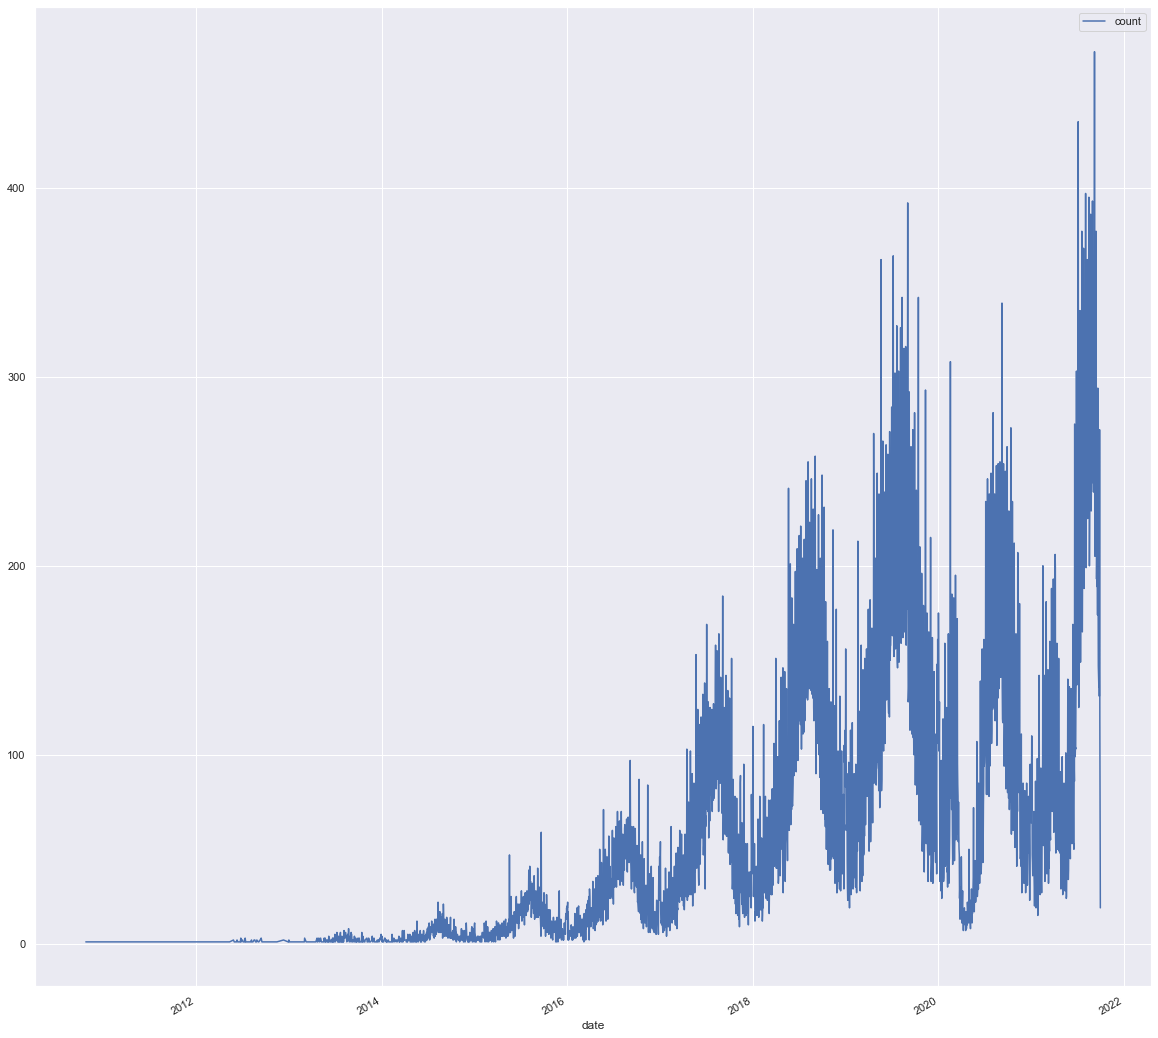

In [88]:
reviews.groupby("date").sum().plot(figsize=(20, 20));

## 7.Kiek laisvų kambarių yra iki 2022-01-01?


In [89]:
calendar = pd.read_csv(
    "C://Users//Win10//Desktop//programavimas//biod2021//nd1//rugsejis//calendar.csv",
    parse_dates=["date"],
    index_col=["listing_id"],
)

C:\Users\Win10\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [90]:
calendar.head(2)

date available    price adjusted_price  minimum_nights  \
listing_id                                                                
1591       2021-09-30         f  $199.00        $199.00             1.0   
1591       2021-10-01         t  $189.00        $189.00             1.0   

            maximum_nights  
listing_id                  
1591                1125.0  
1591                1125.0

In [91]:
calendar.price = calendar.price.str.replace(",", "")
calendar["price"] = pd.to_numeric(calendar["price"].str.strip("$"))
calendar = calendar[calendar.date < "2022-01-01"]
calendar.head(2)

date available  price adjusted_price  minimum_nights  \
listing_id                                                              
1591       2021-09-30         f  199.0        $199.00             1.0   
1591       2021-10-01         t  189.0        $189.00             1.0   

            maximum_nights  
listing_id                  
1591                1125.0  
1591                1125.0

In [92]:
not_occupied = (
    calendar[calendar.available == "t"]
    .groupby(["date"])
    .size()
    .to_frame(name="available")
    .reset_index()
)
not_occupied.head()

date  available
0 2021-09-29         93
1 2021-09-30        313
2 2021-10-01        190
3 2021-10-02        237
4 2021-10-03        595

In [93]:
not_occupied["weekday"] = not_occupied["date"].dt.day_name() 
not_occupied = not_occupied.set_index("date")
not_occupied

available    weekday
date                            
2021-09-29         93  Wednesday
2021-09-30        313   Thursday
2021-10-01        190     Friday
2021-10-02        237   Saturday
2021-10-03        595     Sunday
2021-10-04        676     Monday
2021-10-05        698    Tuesday
2021-10-06        733  Wednesday
2021-10-07        657   Thursday
2021-10-08        383     Friday
2021-10-09        243   Saturday
2021-10-10        359     Sunday
2021-10-11        731     Monday
2021-10-12        835    Tuesday
2021-10-13        865  Wednesday
2021-10-14        770   Thursday
2021-10-15        644     Friday
2021-10-16        670   Saturday
2021-10-17        864     Sunday
2021-10-18        936     Monday
2021-10-19        966    Tuesday
2021-10-20        994  Wednesday
2021-10-21        949   Thursday
2021-10-22        826     Friday
2021-10-23        825   Saturday
2021-10-24       1025     Sunday
2021-10-25       1128     Monday
2021-10-26       1184    Tuesday
2021-10-27       1193  Wednesday
2021-10-28       1201   Thursday
2021-10-29       1129     Friday
2021-10-30       1153   Saturday
2021-10-31       1353     Sunday
2021-11-01       1346     Monday
2021-11-02       1394    Tuesday
2021-11-03       1399  Wednesday
2021-11-04       1365   Thursday
2021-11-05       1286     Friday
2021-11-06       1251   Saturday
2021-11-07       1340     Sunday
2021-11-08       1329     Monday
2021-11-09       1347    Tuesday
2021-11-10       1275  Wednesday
2021-11-11       1160   Thursday
2021-11-12       1137     Friday
2021-11-13       1177   Saturday
2021-11-14       1366     Sunday
2021-11-15       1427     Monday
2021-11-16       1447    Tuesday
2021-11-17       1459  Wednesday
2021-11-18       1445   Thursday
2021-11-19       1379     Friday
2021-11-20       1374   Saturday
2021-11-21       1438     Sunday
2021-11-22       1460     Monday
2021-11-23       1467    Tuesday
2021-11-24       1456  Wednesday
2021-11-25       1441   Thursday
2021-11-26       1402     Friday
2021-11-27       1408   Saturday
2021-11-28       1512     Sunday
2021-11-29       1558     Monday
2021-11-30       1592    Tuesday
2021-12-01       1592  Wednesday
2021-12-02       1577   Thursday
2021-12-03       1564     Friday
2021-12-04       1560   Saturday
2021-12-05       1599     Sunday
2021-12-06       1625     Monday
2021-12-07       1623    Tuesday
2021-12-08       1626  Wednesday
2021-12-09       1630   Thursday
2021-12-10       1604     Friday
2021-12-11       1603   Saturday
2021-12-12       1631     Sunday
2021-12-13       1646     Monday
2021-12-14       1643    Tuesday
2021-12-15       1638  Wednesday
2021-12-16       1620   Thursday
2021-12-17       1578     Friday
2021-12-18       1552   Saturday
2021-12-19       1544     Sunday
2021-12-20       1516     Monday
2021-12-21       1506    Tuesday
2021-12-22       1464  Wednesday
2021-12-23       1331   Thursday
2021-12-24       1258     Friday
2021-12-25       1260   Saturday
2021-12-26       1264     Sunday
2021-12-27       1317     Monday
2021-12-28       1214    Tuesday
2021-12-29       1236  Wednesday
2021-12-30       1238   Thursday
2021-12-31       1253     Friday

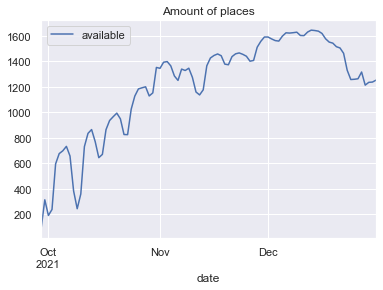

In [94]:
not_occupied.plot(y="available", title="Amount of places", legend="Amount of places");

## 8. Laisvų būstų vidutinės kainos.

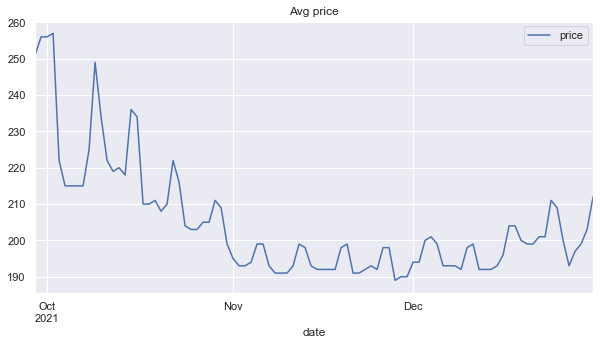

In [95]:
avg_price = (
    calendar[(calendar.available == "t")]
    .groupby(["date"])
    .mean()
    .astype(np.int64)
    .reset_index()
)
avg_price["weekday"] = avg_price["date"].dt.day_name()
avg_price = avg_price.set_index("date")
avg_price.plot(y="price", title="Avg price", figsize=(10, 5));

## 9. Kur ir koks būstas pigiausias?

In [96]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'property_type', 'accommodates',
       'first_review', 'review_scores_value', 'review_scores_cleanliness',
       'review_scores_location', 'review_scores_accuracy',
       'review_scores_communication', 'review_scores_checkin',
       'review_scores_rating', 'maximum_nights', 'listing_url',
       'host_is_superhost', 'host_about', 'host_response_time',
       'host_response_rate', 'neighbourhood_cleansed'],
      dtype='object')

In [97]:
low_price = (
    listings.groupby("neighbourhood")["price"]
    .min()
    .sort_values(ascending=True)
)

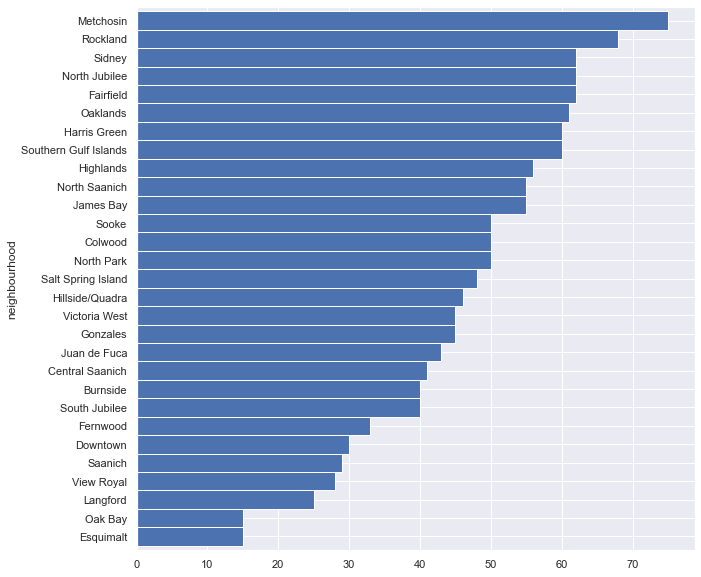

In [98]:
low_price.plot.barh(figsize=(10, 10), color="b", width=1);

In [99]:
mini=listings['price']
mini_count=mini.min()
mini_count

15

In [100]:
low_price_places=listings.loc[listings['price']==15]
low_price_places

name   host_id  \
id                                                                       
7875911                   Private Camping Cottage in Oak Bay  12150664   
14912799  Ocean View King Bed Parking Fireplace Tea/Coffee++  58658923   

         host_name neighbourhood_group neighbourhood  latitude  longitude  \
id                                                                          
7875911      David             Oak Bay       Oak Bay  48.43452 -123.31509   
14912799     Marie           Esquimalt     Esquimalt  48.43070 -123.40355   

                room_type  price  minimum_nights  number_of_reviews  \
id                                                                    
7875911      Private room     15               1                  2   
14912799  Entire home/apt     15               2                 42   

         last_review  reviews_per_month  calculated_host_listings_count  \
id                                                                        
7875911   2018-11-16               0.05                               2   
14912799  2019-08-11               0.69                               1   

          availability_365  number_of_reviews_ltm             property_type  \
id                                                                            
7875911                213                      0  Private room in bungalow   
14912799                 0                      0        Entire rental unit   

          accommodates first_review  review_scores_value  \
id                                                         
7875911              1   2018-08-02                  5.0   
14912799             2   2016-10-10                  4.8   

          review_scores_cleanliness  review_scores_location  \
id                                                            
7875911                         5.0                     5.0   
14912799                        5.0                     5.0   

          review_scores_accuracy  review_scores_communication  \
id                                                              
7875911                     5.00                          5.0   
14912799                    4.95                          5.0   

          review_scores_checkin  review_scores_rating  maximum_nights  \
id                                                                      
7875911                     5.0                  5.00            1125   
14912799                    5.0                  4.93              10   

                                    listing_url host_is_superhost  \
id                                                                  
7875911    https://www.airbnb.com/rooms/7875911                 f   
14912799  https://www.airbnb.com/rooms/14912799                 f   

                                                                                                                                                                                                                                                                                                  host_about  \
id                                                                                                                                                                                                                                                                                                             
7875911   Married with three children.  Have five hens in the backyard and a dog so can get exciting at times.  We hope to provide our guests with a safe and friendly place to stay on their visit to Victoria. So far we've had only positive experiences hosting with Air B&B, we hope the fun continues!   
14912799                                                            Worldwide traveller and professional still enjoying her full-time job who understands people's passions and who is happy to share her living space with passionate travellers.\n\nI do hope you will have a good time while in Victoria.   

     

In [101]:
longitude=low_price_places['longitude']

In [102]:
latitude=low_price_places['latitude']

In [103]:
lats1 = low_price_places["latitude"].tolist()
lons1 = low_price_places["longitude"].tolist()
locations = list(zip(lats1, lons1))


In [104]:
map2 = folium.Map(location=[48.43452, -123.31509], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map2)
map2

## 10. Kur ir koks būstas brangiausias?

In [105]:
high_price = (
    listings.groupby("neighbourhood")["price"]
    .max()
    .sort_values(ascending=True)
)

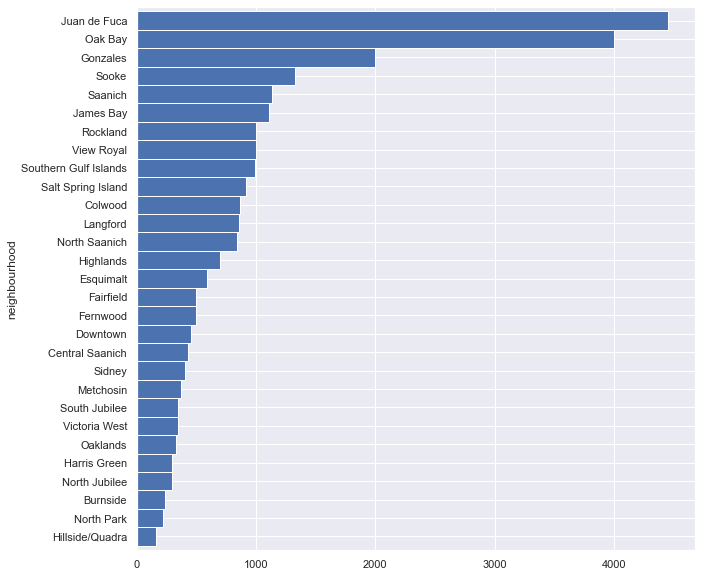

In [106]:
high_price.plot.barh(figsize=(10, 10), color="b", width=1);

In [107]:
maxi=listings['price']
maxi_count=mini.max()
maxi_count

4453

In [108]:
high_price_places=listings.loc[listings['price']==4453]
high_price_places

name   host_id host_name neighbourhood_group neighbourhood  latitude  \
id                                                                             
8256169  NaN  43538963      Judy        Juan de Fuca  Juan de Fuca  48.57686   

         longitude        room_type  price  minimum_nights  number_of_reviews  \
id                                                                              
8256169 -123.48541  Entire home/apt   4453               6                  0   

        last_review  reviews_per_month  calculated_host_listings_count  \
id                                                                       
8256169         NaN                NaN                               1   

         availability_365  number_of_reviews_ltm property_type  accommodates  \
id                                                                             
8256169               363                      0  Entire place             1   

        first_review  review_scores_value  review_scores_cleanliness  \
id                                                                     
8256169          NaN                  NaN                        NaN   

         review_scores_location  review_scores_accuracy  \
id                                                        
8256169                     NaN                     NaN   

         review_scores_communication  review_scores_checkin  \
id                                                            
8256169                          NaN                    NaN   

         review_scores_rating  maximum_nights  \
id                                              
8256169                   NaN            1125   

                                  listing_url host_is_superhost  \
id                                                                
8256169  https://www.airbnb.com/rooms/8256169                 f   

                                                                                                                                                                                                                                                  host_about  \
id                                                                                                                                                                                                                                                             
8256169  Retired nurse. We built Brentwood Bluff as our someday home that we only get to use part time for awhile longer. We are very lucky to have such of peaceful view. We love to kayak, fish, garden and just plain relax in this heaven on earth acre.   

         host_response_time  host_response_rate neighbourhood_cleansed  
id                                                                      
8256169  a few days or more                 0.0           Juan de Fuca

In [109]:
lats2 = high_price_places["latitude"].tolist()
lons2 = high_price_places["longitude"].tolist()
locations1 = list(zip(lats2, lons2))

In [110]:
map3 = folium.Map(location=[48.57686, -123.48541], zoom_start=11.5)
FastMarkerCluster(data=locations1).add_to(map3)
map3